In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
df=pd.read_csv("shipments.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time_Y_N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.shape

(10999, 12)

In [5]:
df.dropna()
df.shape

2021-09-15 11:01:18.684 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


(10999, 12)

In [6]:
df.drop(["ID"],inplace=True,axis=1)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [7]:
df2=pd.get_dummies(df)
df2

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


<AxesSubplot:>

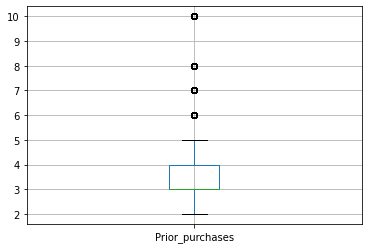

In [8]:
df2.boxplot("Prior_purchases")

<AxesSubplot:>

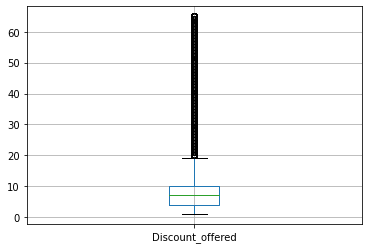

In [9]:
df2.boxplot("Discount_offered")

<AxesSubplot:>

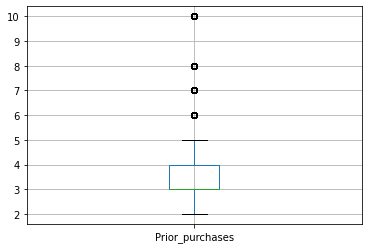

In [10]:
df2.boxplot("Prior_purchases")

<AxesSubplot:xlabel='Warehouse_block', ylabel='Count'>

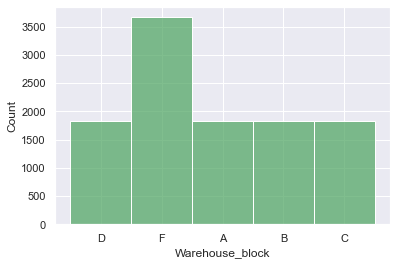

In [11]:
sns.set(color_codes=True)
sns.histplot(df['Warehouse_block'],color='g')

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='Count'>

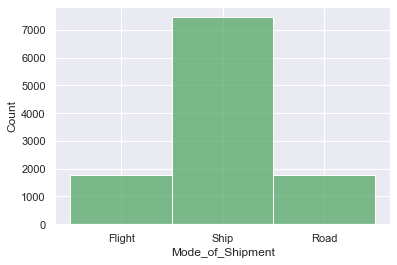

In [12]:
sns.set(color_codes=True)
sns.histplot(df['Mode_of_Shipment'],color='g')

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Count'>

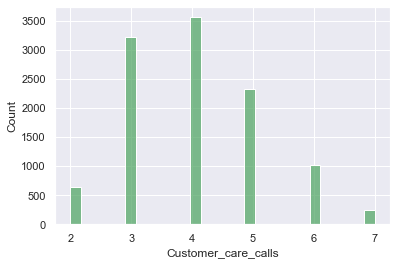

In [13]:
sns.set(color_codes=True)
sns.histplot(df['Customer_care_calls'],color='g')

<AxesSubplot:xlabel='Customer_rating', ylabel='Count'>

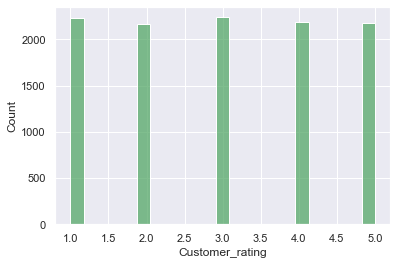

In [14]:
sns.set(color_codes=True)
sns.histplot(df['Customer_rating'],color='g')

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

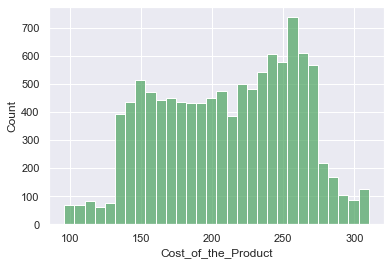

In [15]:
sns.set(color_codes=True)
sns.histplot(df['Cost_of_the_Product'],color='g')

<AxesSubplot:xlabel='Prior_purchases', ylabel='Count'>

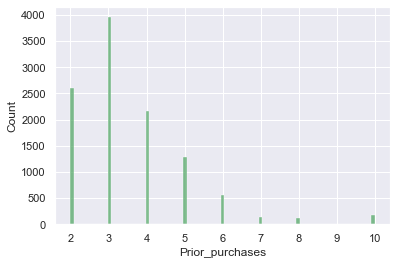

In [16]:
sns.set(color_codes=True)
sns.histplot(df['Prior_purchases'],color='g')

<AxesSubplot:xlabel='Product_importance', ylabel='Count'>

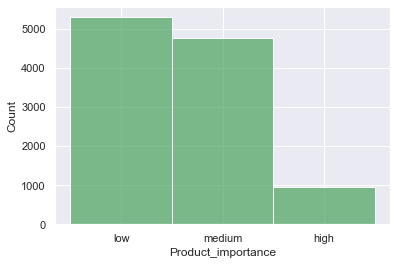

In [17]:
sns.set(color_codes=True)
sns.histplot(df['Product_importance'],color='g')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

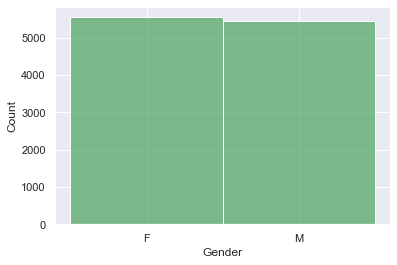

In [18]:
sns.set(color_codes=True)
sns.histplot(df['Gender'],color='g')

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

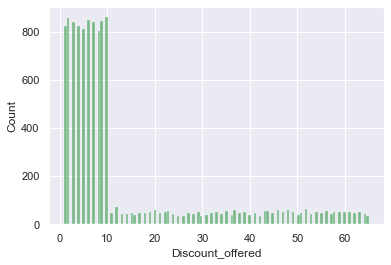

In [19]:
sns.set(color_codes=True)
sns.histplot(df['Discount_offered'],color='g')

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

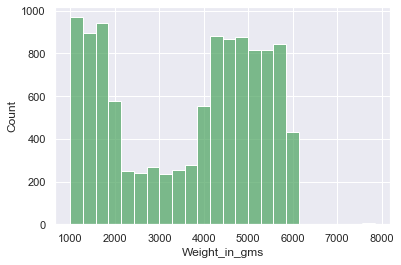

In [20]:
sns.set(color_codes=True)
sns.histplot(df['Weight_in_gms'],color='g')

<AxesSubplot:xlabel='Reached_on_Time_Y_N', ylabel='Count'>

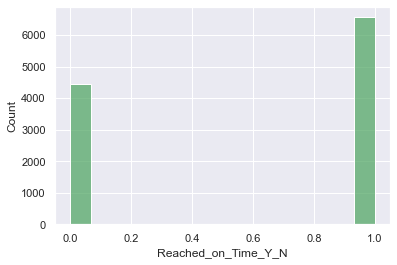

In [21]:
sns.set(color_codes=True)
sns.histplot(df['Reached_on_Time_Y_N'],color='g')

# Regression Without removing outliers

In [22]:
df3 = df2[['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Product_importance_high','Product_importance_low','Product_importance_medium','Gender_F','Gender_M','Reached_on_Time_Y_N']]
df3

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M,Reached_on_Time_Y_N
0,4,2,177,3,44,1233,0,0,0,1,0,1,0,0,0,1,0,1,0,1
1,4,5,216,2,59,3088,0,0,0,0,1,1,0,0,0,1,0,0,1,1
2,2,2,183,4,48,3374,1,0,0,0,0,1,0,0,0,1,0,0,1,1
3,3,3,176,4,10,1177,0,1,0,0,0,1,0,0,0,0,1,0,1,1
4,2,2,184,3,46,2484,0,0,1,0,0,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,0,1,0,0,1,1,0,1
10995,4,1,232,5,6,1247,0,1,0,0,0,0,0,1,0,0,1,1,0,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,0,1,0,1,0,1,0,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,0,1,0,0,1,0,1,0


In [23]:
X = df3.iloc[:,0:19]
Y = df3.iloc[:,19]


In [24]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [25]:
y_pred = classifier.predict(X)

In [26]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [27]:
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10994,1,0
10995,0,1
10996,0,1
10997,0,0


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[2582 1854]
 [2124 4439]]


In [52]:
((2582+4439)/(10999))*100

63.83307573415765

In [30]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      4436
           1       0.71      0.68      0.69      6563

    accuracy                           0.64     10999
   macro avg       0.63      0.63      0.63     10999
weighted avg       0.64      0.64      0.64     10999



Text(0, 0.5, 'True Positive Rate')

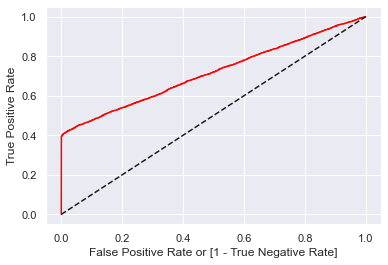

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [32]:
auc

0.6292117105389162

# Regression by removing the Outliers

In [33]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [34]:
q3=df.quantile(0.75)
q1=df.quantile(0.25)
iqr=q3-q1
ub=q3+((1.5)*(iqr))
lb=q1-(1.5*(iqr))
print(ub,
     lb)

Customer_care_calls       8.00
Customer_rating           7.00
Cost_of_the_Product     374.00
Prior_purchases           5.50
Discount_offered         19.00
Weight_in_gms          9865.75
Reached_on_Time_Y_N       2.50
dtype: float64 Customer_care_calls       0.00
Customer_rating          -1.00
Cost_of_the_Product      46.00
Prior_purchases           1.50
Discount_offered         -5.00
Weight_in_gms         -2976.25
Reached_on_Time_Y_N      -1.50
dtype: float64


In [35]:
index=df3[(df3.Prior_purchases>5.50)|(df3.Prior_purchases<1.50)|(df3.Discount_offered>19.0)|(df3.Discount_offered<-5.00)].index

In [36]:
len(index)

3028

In [37]:
df3.shape

(10999, 20)

In [38]:
df4=df3.drop(index)

In [39]:
df4.shape

(7971, 20)

In [40]:
X = df4.iloc[:,0:19]
Y = df4.iloc[:,19]

In [41]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [42]:
y_pred = classifier.predict(X)

In [43]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [44]:
y_pred_df

,actual,predicted_prob
3,1,1
5,1,1
6,1,1
8,1,1
10,1,1
...,...,...
10992,0,0
10994,1,0
10995,0,1
10996,0,1


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[2562 1462]
 [2087 1860]]


In [46]:
((2562+1860)/(2562+1462+2087+1860))*100

55.47610086563793

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59      4024
           1       0.56      0.47      0.51      3947

    accuracy                           0.55      7971
   macro avg       0.56      0.55      0.55      7971
weighted avg       0.56      0.55      0.55      7971



Text(0, 0.5, 'True Positive Rate')

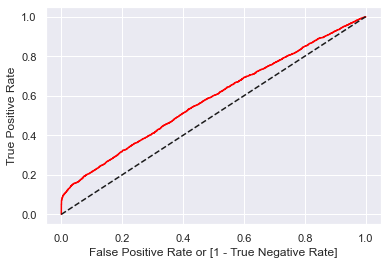

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [50]:
auc

0.5539619516244313